#  Create KDE Plots


# 1. import

In [38]:
# imports
import matplotlib
import matplotlib.pyplot as plt
from statistics import median
import numpy as np
import os
import pandas as pd
import scipy.stats
import seaborn as sns
import warnings
from sklearn import preprocessing

%matplotlib inline
warnings.filterwarnings("ignore")
font = {
        'family' : 'serif',
        'size'   : 26}

matplotlib.rc('font', **font)

##### Note: Code below can produce all plots for 6 classifiers but Because each chart needed adjustments, I produced them separately

In [41]:
def cls_kde_plot(file_path,cls,important_hyperparameter,x1,x2, b=0,kernel=None,scale=None):
    
    
    #file_path="../PerformanceData/total/AB_results_total.csv"
    df= pd.read_csv(file_path)
    df_total=pd.DataFrame()


    for item in df.dataset.unique():

        df_dataset=df.loc[df['dataset'] == item ]
    
        # df_dataset=df_dataset[df_dataset['silhouette_score']<1.0]
     
        if df_dataset.empty:
            continue
        else:
            n=10 # top 10 best
            df_row=df_dataset.nlargest(10,'silhouette_score')
 
        df_total = df_total.append(df_row)

        
    plt.figure(figsize=(12,10))
    
    #set bandwidth for kde
    le = preprocessing.LabelEncoder()
    le.fit(df_total[important_hyperparameter])
    encoded_important_hyperparameter = le.transform(df_total[important_hyperparameter])
    
    sns.kdeplot(encoded_important_hyperparameter, legend=False, color="#ed0dd9", linewidth=2)
        
    # if kernel != None:    
    #     plt.title(cls+"-"+kernel+":"+important_hyperparameter )
    # else: 
    #     plt.title(cls+":"+important_hyperparameter )
    plt.xlim(x1,x2)
    # plt.ylim(y1,y2)
    plt.xticks(rotation=30)
    plt.xlabel("Hyperparameter value")
    plt.ylabel("Probability")
    if scale!=None:
        plt.xscale(scale)
        
    
 
    plt.savefig(f"../output_plots/{cls}_{important_hyperparameter}.pdf" ,bbox_inches = 'tight',pad_inches = 0, format='pdf')

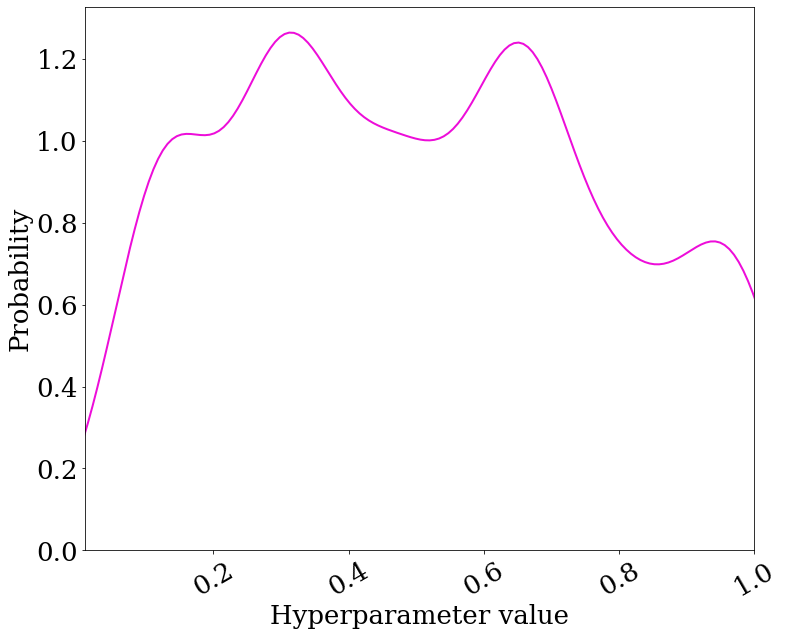

In [34]:

cls_kde_plot("../performance_data/dbscan_results.csv","dbscan","eps",0.01,1)

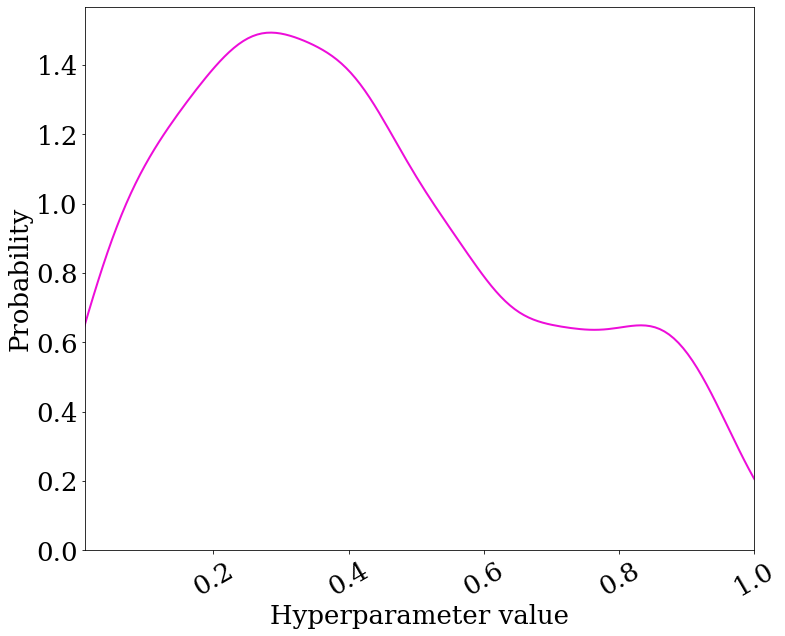

In [35]:
cls_kde_plot("../performance_data/optics_results.csv","optics","xi",0.01,1)

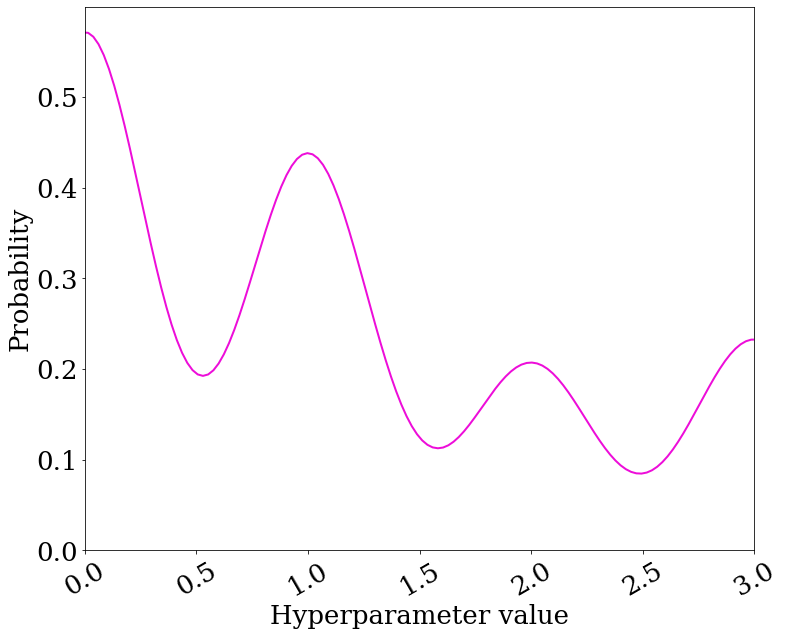

In [42]:
cls_kde_plot("../performance_data/agglomerativeclustering_results.csv","agglomerativeclustering","linkage",0,3)